# Analyzing the wildfire activities in Australia

Objective \
To analyze and visualize the wildfire activities in Australia using the provided dataset and explore patterns and trends, and create visualizations to gain insights into the behavior of wildfires in different regions of Australia.

*VariableS\

*Region: the 7 regions\
*Date: in UTC and provide the data for 24 hours ahead\
*Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires\
                      with a confidence > 75% for a each region in km2\
*Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness\ 
                                 for presumed vegetation fires with a confidence level > 75% in Kelvin\
*Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation\
                                    fires with a confidence level > 75% for a given region in megawatts\
*Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%\
*Std_confidence: standard deviation of estimated fire radiative power in megawatts\
*Var_confidence: Variance of estimated fire radiative power in megawatts\
*Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region\
     Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available\
                                        (usually with a 2-3 month lag). Replaced data has a slightly higher quality\
                                        in terms of locations


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv")

In [3]:
data.head(2)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8,R


Let's do Data Wrangling

In [4]:
data.isnull().sum()

Region                                    0
Date                                      0
Estimated_fire_area                       0
Mean_estimated_fire_brightness            0
Mean_estimated_fire_radiative_power       0
Mean_confidence                           0
Std_confidence                         2207
Var_confidence                         2207
Count                                     0
Replaced                                  0
dtype: int64

Columns "Std_confidence" and "Var_confidence" have 2207 nulls each

In [5]:
data.shape

(26406, 10)

Let's check the null values in columns "Std_confidence" and "Var_confidence"

In [6]:
Columns_with_NA = data[['Std_confidence', 'Var_confidence']]

In [7]:
mask = Columns_with_NA.isnull().any(axis=1)

In [8]:
rows_with_missing = data[mask]

In [9]:
rows_with_missing.head(2)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
48,NSW,2/26/2005,1.0,303.15,8.0,79.0,NaN,NaN,1,R
149,NSW,6/12/2005,1.0,302.55,17.9,79.0,NaN,NaN,1,R


As our objective doesn't involve constructing a model, our aim is to generate visual representations that facilitate a deeper understanding of wildfire patterns across various regions in Australia.

In [10]:
#mean of mean 
#mean estimated_area 
#mean count
#max and min


Let's check the data type of each column to see if appropriate 

In [11]:
data.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Observe that the 'Date' column is of the 'object' type. We should convert it to the 'datetime' type and additionally extract the 'Year' and 'Month' from the date, incorporating them into the dataframe as distinct columns.

In [12]:
import datetime as dt

In [14]:
data['NYear'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.year


In [15]:
#check again
data.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
NYear                                    int64
Month                                    int64
dtype: object

Let's try to understand the change in average estimated fire area over time

In [16]:
estimated_fire_area_over_time = data['Estimated_fire_area'].groupby(by=data['NYear']).mean()

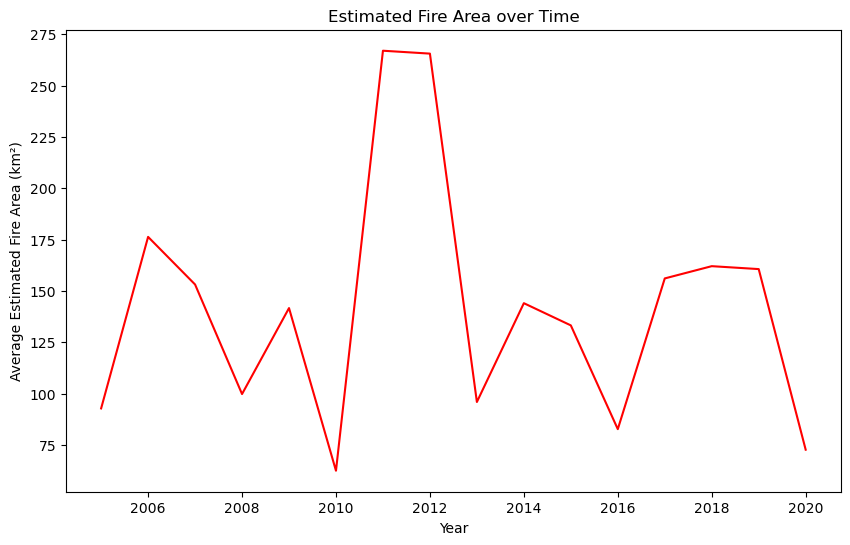

In [20]:
plt.figure(figsize =(10,6))
estimated_fire_area_over_time.plot(kind='line', color = 'r')
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

In [1]:
pip3.8 install setuptools

SyntaxError: invalid syntax (2765532734.py, line 1)

In [ ]:
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update
import datetime as dt

#Create app

app = dash.Dash(__name__)

# Clear the layout and do not display exception till callback gets executed
app.config.suppress_callback_exceptions = True

# Read the wildfire data into pandas dataframe
df =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv')

#Extract year and month from the date column

df['Month'] = pd.to_datetime(df['Date']).dt.month_name(locale = 'English') #used for the names of the months
df['Year'] = pd.to_datetime(df['Date']).dt.year

#Layout Section of Dash

#Task 2.1 Add the Title to the Dashboard
app.layout = html.Div(children=[html.H1('Australia Wildfire Dashboard', style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 26}),

# TASK 2.2: Add the radio items and a dropdown right below the first inner division
#outer division starts
     html.Div([
          html.H2('Select Region:', style={'margin-right': '2em'}),
             #Radio items to select the region
             dcc.RadioItems(['NSW','QL','SA','TA','VI','WA'], 'NSW', id='region',inline=True)]),
            
                   # First inner divsion for  adding dropdown helper text for Selected Drive wheels
                    html.Div([
                        html.H2('Select Year:', style={'margin-right': '2em'}),
                        dcc.Dropdown(df.Year.unique(), value = 2005,id='year')
                        #notice the use of unique() from pandas to fetch the values of year from the dataframe for dropdown
                    ]),
                            html.H2(.........),

                    #Radio items to select the region
                    #dcc.RadioItems(['NSW',.....], value ='...', id='...',inline=True)]),
                    dcc.RadioItems([{"label":"New South Wales","value": "NSW"},
                                    {..........},
                                    {..........},
                                    {..........},
                                    {..........},
                                    {..........},
                                    {"label":"...","value": ..}], value = "...", id='.....,inline=True)]),
                    #Dropdown to select year
                    html.Div([
                            html.H2('.........', style={...........}),
                        dcc.Dropdown(.....................)
                    ]),
#Second Inner division for adding 2 inner divisions for 2 output graphs
#TASK 2.3: Add two empty divisions for output inside the next inner division.
                    html.Div([
                
                        html.Div([ ], id='........'),
                        html.Div([ ], id='.........')
                    ], style={'.........}),

    ])
    #outer division ends

])
#layout ends
#TASK 2.4: Add the Ouput and input components inside the app.callback decorator.
#Place to add @app.callback Decorator
@app.callback([Output(component_id=.........., component_property=..........),
               Output(component_id=.........., component_property=..........)],
               [Input(component_id=.........., component_property=..........),
                Input(component_id=.........., component_property=..........)])

   
#TASK 2.5: Add the callback function.
#Place to define the callback function .
def reg_year_display(input_region,input_year):
    
    #data
   region_data = df[df['Region'] == input_region]
   y_r_data = region_data[region_data['Year']==input_year]
    #Plot one - Monthly Average Estimated Fire Area
   
   est_data = .........................
 
   fig1 = px.pie(.............., title="{} : Monthly Average Estimated Fire Area in year {}".format(input_region,input_year))
   
     #Plot two - Monthly Average Count of Pixels for Presumed Vegetation Fires
   veg_data = .............................
   fig2 = px.bar(..............., title='{} : Average Count of Pixels for Presumed Vegetation Fires in year {}'.format(input_region,input_year))
    
   return [.......,
            ......... ]

if __name__ == '__main__':
    app.run_server()